In [1]:
import sys

import numpy as np
import pandas as pd

import pygmt

In [2]:
sys.path.append('.')
from coupe import coupe

In [3]:
df_meca = pd.DataFrame(
    [
        [133.3498, 35.2752, 11.26, 150, 85, -9, 241, 81, -175, 4.97, 18,],
        [133.33, 35.3, 5.26, 151, 29, -122, 5, 67, -74, 8.62, 18],
        [133.3668, 35.255, 8.26, 223.5, 61.2, 98, 24.9, 30.3, 72.1, 6.12, 18],
    ],
    columns=[
        'longitude','latitude','depth',
        'strike1','dip1','rake1','strike2','dip2','rake2',
        "mantissa","exponent",
    ]
)

In [23]:
np.arange(-0.1,0.075,0.025)

array([-1.00000000e-01, -7.50000000e-02, -5.00000000e-02, -2.50000000e-02,
       -2.77555756e-17,  2.50000000e-02,  5.00000000e-02])

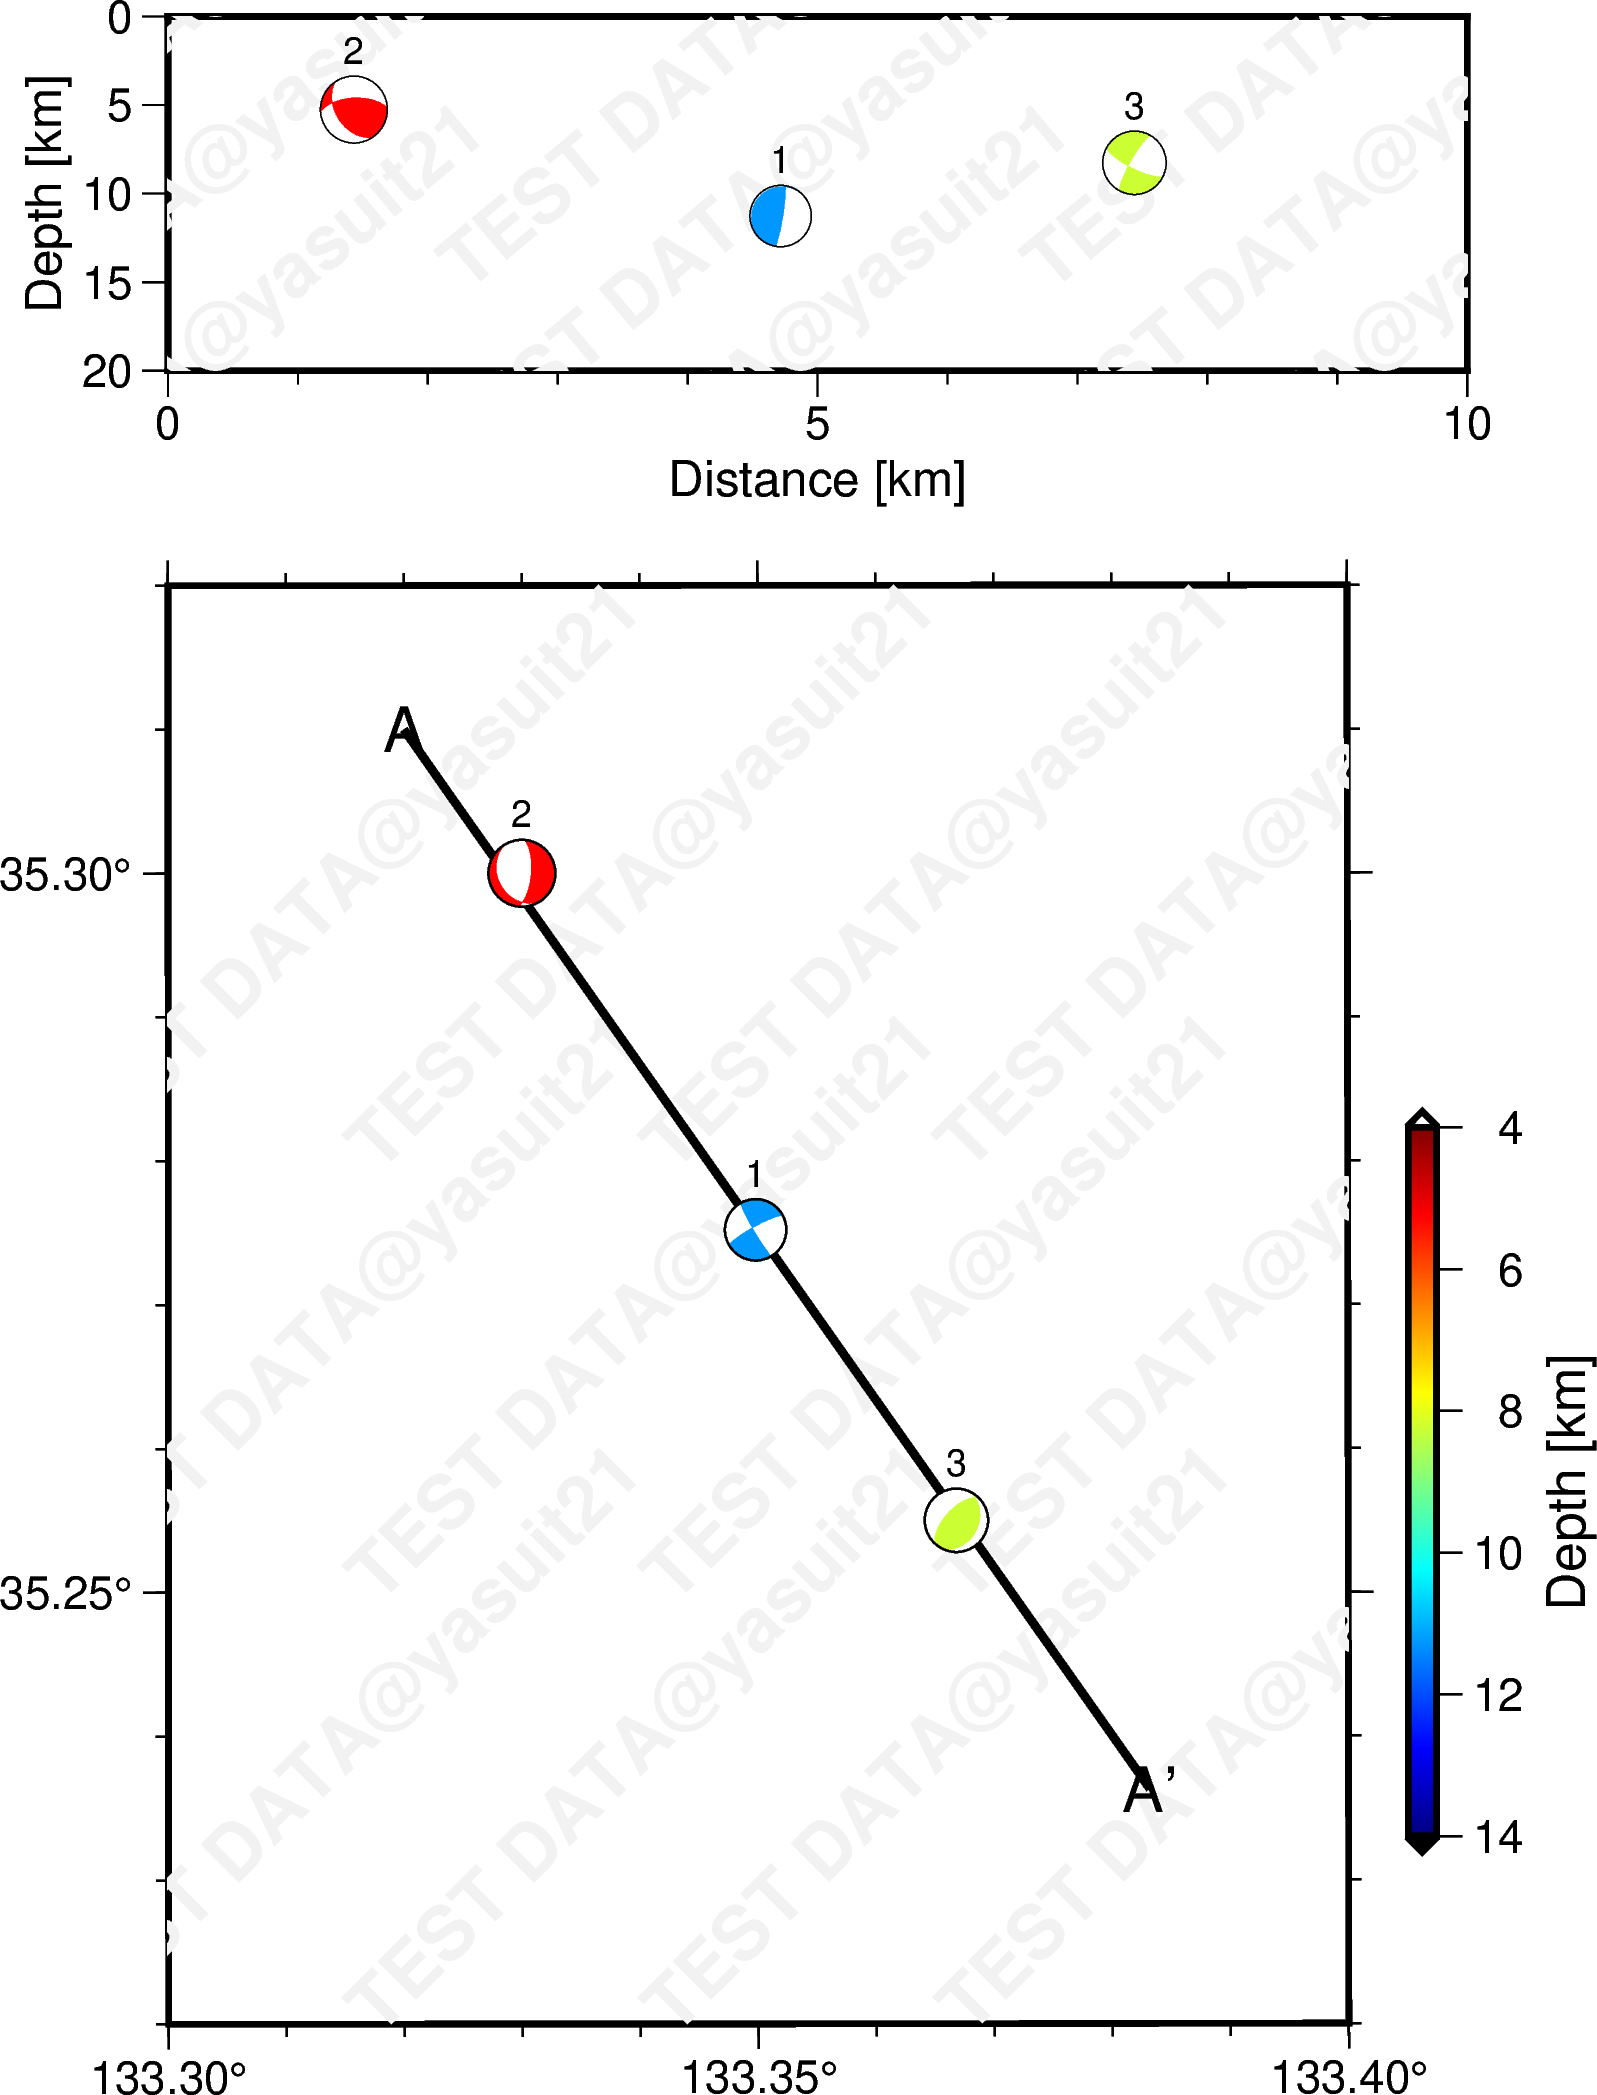

In [52]:
fig = pygmt.Figure()

pygmt.config(
    FONT_TITLE="15p,Helvetica,black",
    MAP_FRAME_TYPE="plain",
    MAP_FRAME_PEN="1.5p",
    FORMAT_GEO_MAP="ddd.xx",
    FONT_ANNOT="11p",
    MAP_TICK_LENGTH="6p"
)

fig.basemap(
    region=[133.3,133.4,35.22,35.32],
    projection="T133.25/10c",
    frame=["WSne","xa0.05f0.01", "ya0.05f0.01"],
)

from itertools import product
for _lon, _lat in product(np.arange(-0.06,0.06,0.025),np.arange(-0.06,0.06,0.03)):
    fig.text(
        x=133.35+_lon, y=35.27+_lat, angle=45,
        text='TEST DATA\\100yasuit21',
        font='18p,Helvetica-Bold,gray95',
        transparency=60,
    )

center = [133.32,35.31]
azimuth = 145

lineA = pygmt.project(
    generate='5k',
    center=center,
    azimuth=azimuth,
    length=[0,10],
    unit=True
)

fig.plot(
    lineA,
    pen='2p'
)
fig.text(x=lineA[:1].r,y=lineA[:1].s,text='A',font='15p')
fig.text(x=lineA[-1:].r,y=lineA[-1:].s,text='A\'',font='15p')

pygmt.makecpt(cmap='jet', series=[4,14], reverse=True)
fig.colorbar(frame='xa2+lDepth [km]', position="JMR+o0.5c/-1.5c+w-6c+ebf",)

fig.meca(
    df_meca,
    scale="1.5c",
    cmap=True,
    pen="0.5p,black,solid",
    transparency=30,
    event_name=['1','2','3'],
)


fig.shift_origin(yshift="14.c")
fig.basemap(
    region=[0, 10, 0, 20],  # x_min, x_max, y_min, y_max
    projection="X11c/-3c",
    frame=["WSrt", "xa5f1+lDistance [km]", "ya5+lDepth [km]"],
)

for _lon, _lat in product(np.arange(0.,11.,4.5),np.arange(0,21,10)):
    fig.text(
        x=_lon, y=_lat, angle=40,
        text='TEST DATA\\100yasuit21',
        font='18p,Helvetica-Bold,gray95',
        transparency=60,
    )

coupe(
    fig,
    df_meca,
    "1.5c",
    section=center+[azimuth,10],
    section_format='lonlat_strlen',
    cmap=True,
    no_file=True,
)

fig.show()
# fig.savefig('coupe_example.png', dpi=300)